In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline 

In [2]:
train = pd.read_csv("train.csv").drop(columns=['id'])
test = pd.read_csv("test.csv").drop(columns=['id'])

target_feature = train.iloc[:,11]
train = train.drop(columns = 'quality')

index = train.index
num_rows = len(index)
num_columns = 11

index = test.index
test_rows = len(index)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         799 non-null    float64
 1   volatile acidity      799 non-null    float64
 2   citric acid           799 non-null    float64
 3   residual sugar        799 non-null    float64
 4   chlorides             799 non-null    float64
 5   free sulfur dioxide   799 non-null    float64
 6   total sulfur dioxide  799 non-null    float64
 7   density               799 non-null    float64
 8   pH                    799 non-null    float64
 9   sulphates             799 non-null    float64
 10  alcohol               799 non-null    float64
dtypes: float64(11)
memory usage: 68.8 KB


-Below we'll take a look at the histograms for each feature
-We can see that there are a mix of fairly normal distributions and skewed ones which makes me think standardization may be necessary

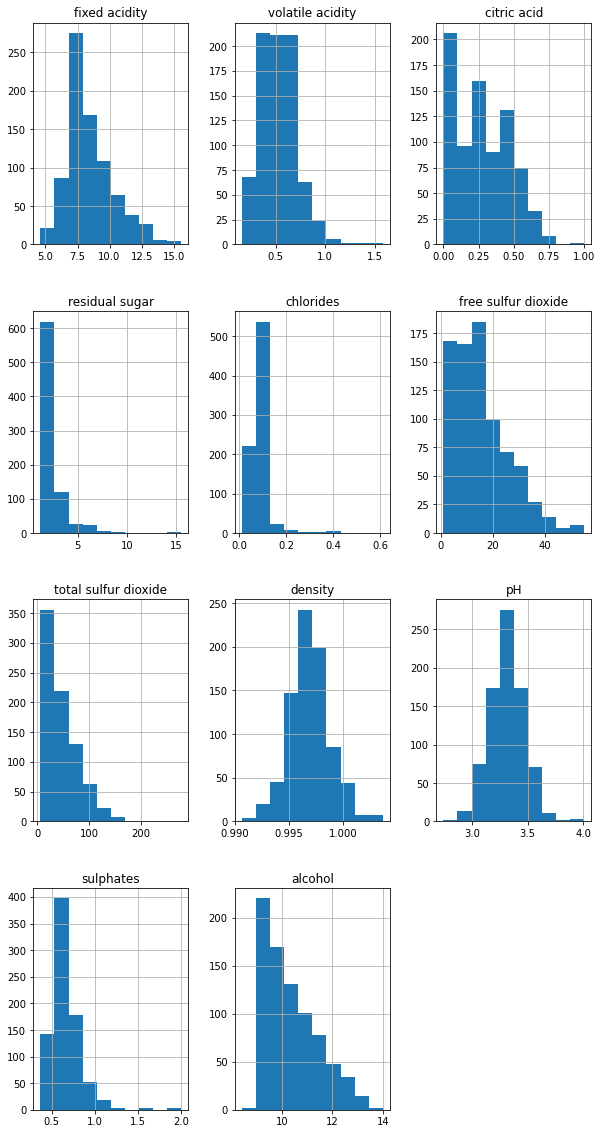

In [3]:
train.hist(figsize=(10,20))
plt.show()

-We'll look for missing values next and see that there are none missing

In [4]:
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [5]:
def Zscore_outlier(df):
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 4: 
            out.append(i)
    print("Outliers:",out)
            
column_counter = 0
    
for column in train:
    out=[]
    Zscore_outlier(train.iloc[:,column_counter])
    median = train.iloc[:,column_counter].median()
    for x in range(num_rows):
        if(train.iloc[x,column_counter] in out):
            train.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1
    
column_counter = 0
    
for column in test:
    out=[]
    Zscore_outlier(test.iloc[:,column_counter])
    median = test.iloc[:,column_counter].median()
    for x in range(test_rows):
        if(test.iloc[x,column_counter] in out):
            test.iloc[x,column_counter] = median#Replace outliers with median 
    column_counter+=1


Outliers: [15.6, 15.6, 15.5, 15.0]
Outliers: [1.18, 1.33, 1.58]
Outliers: [1.0]
Outliers: [15.5, 15.4, 8.6, 9.0, 8.1, 15.4, 7.8, 8.3, 8.3, 7.9, 13.9]
Outliers: [0.415, 0.341, 0.415, 0.263, 0.61, 0.337, 0.467, 0.267, 0.40299999999999997, 0.358, 0.25, 0.42200000000000004, 0.414]
Outliers: [55.0, 54.0, 55.0, 52.0]
Outliers: [278.0]
Outliers: [1.00369, 1.00369]
Outliers: [3.9, 4.01, 2.74, 3.9]
Outliers: [1.95, 1.98, 2.0, 1.61, 1.62, 1.31, 1.33, 1.56]
Outliers: []
Outliers: [15.0, 15.5, 15.9]
Outliers: [1.24, 1.33, 1.185]
Outliers: []
Outliers: [8.9, 8.3, 7.8, 11.0, 12.9, 10.7, 7.9, 8.8, 8.1, 13.4, 13.8, 13.8, 8.8, 11.0, 7.9]
Outliers: [0.368, 0.611, 0.415, 0.27, 0.401, 0.36, 0.34299999999999997, 0.413, 0.414, 0.387, 0.332, 0.369, 0.46399999999999997]
Outliers: [57.0, 68.0, 72.0, 66.0, 68.0]
Outliers: [289.0, 165.0]
Outliers: [1.00315]
Outliers: [4.01]
Outliers: [1.28, 1.26, 1.59, 1.36, 1.34, 1.36, 1.36, 1.95, 1.28]
Outliers: [14.9]


Next we will scale our data with the standard scaler

Next we'll split our target feature and data into a training and validation set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, target_feature, test_size = 0.1, random_state=42) 

-Next we'll try out the k-nearest neighbor algorithm and try to tune our hyperparameters

In [7]:
model = KNeighborsClassifier(n_neighbors=43) 
  
model.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=43)

In [8]:
pred = model.predict(X_test)

In [9]:

auc_score = metrics.roc_auc_score(y_test,pred)
score = metrics.accuracy_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(auc_score)
print(score)
print(f1)

0.6597744360902256
0.6625
0.689655172413793


Aren't getting good scores after trying a few different k values so we can try a GridSearch to automate

In [278]:
pred = model_3.predict(X_test)

auc_score = metrics.roc_auc_score(y_test,pred)
score = metrics.accuracy_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(auc_score)
print(score)
print(f1)

0.5980392156862746
0.59375
0.5806451612903226


-Even after GridSearch things are worse so going to try pipelining which will add in the step of scaling the data

In [26]:
pipe = Pipeline([('pca', PCA(n_components = 11)), ('std', preprocessing.MinMaxScaler(feature_range=(0, 1))), 
                 ('knn', KNeighborsClassifier(n_neighbors=13,p=20))], verbose = True)

model_4 = pipe.fit(X_train,y_train)

[Pipeline] ............... (step 1 of 3) Processing pca, total=   0.0s
[Pipeline] ............... (step 2 of 3) Processing std, total=   0.0s
[Pipeline] ............... (step 3 of 3) Processing knn, total=   0.0s


In [28]:
leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p= list(range(1,10))

hyperparameters = dict(leaf_size = leaf_size, n_neighbors = n_neighbors, p = p)

model_2 = KNeighborsClassifier()

clf = GridSearchCV(model_4, hyperparameters, cv=11)

model_3 = clf.fit(X_train, y_train)

print('Best leaf_size:', model_3.best_estimator_.get_params()['leaf_size'])
print('Best p:', model_3.best_estimator_.get_params()['p'])
print('Best n_neighbors:', model_3.best_estimator_.get_params()['n_neighbors'])

KeyboardInterrupt: 

In [27]:
pred = model_4.predict(X_test)

auc_score = metrics.roc_auc_score(y_test,pred)
score = metrics.accuracy_score(y_test,pred)
f1 = metrics.f1_score(y_test,pred)
print(auc_score)
print(score)
print(f1)

0.6585213032581454
0.6625
0.6966292134831461


In [21]:
pred = model_4.predict(test)

knn_ouput = pd.DataFrame(data = pred,columns = ["quality"])
knn_ouput.to_csv('output.csv',index_label = 'id')